In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words = open("names.txt","r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [4]:
#build the vocabulary of characters and mappings to/form integers
chars=sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [5]:
#build the dataset
    
block_size = 3
X,Y = [],[]
for w in words:
    #print("\n\n"+w)
    context = [0]*block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:]+[ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)
    

In [6]:
X.shape

torch.Size([228146, 3])

In [7]:
Y.shape

torch.Size([228146])

In [8]:
#build the dataset
 
def build_dataset(words):
    block_size = 3
    X,Y = [],[]
    for w in words:
        #print("\n\n"+w)
        context = [0]*block_size
        for ch in w+'.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:]+[ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X,Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr , Ytr = build_dataset(words[:n1])
Xdev , Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [9]:
C = torch.randn((27,2))
C

tensor([[-1.5945,  1.0734],
        [-1.0846, -0.0713],
        [-0.1301,  0.9727],
        [-0.4667, -0.4369],
        [-1.4506, -0.1302],
        [ 0.4790,  1.2124],
        [ 0.2285, -0.8046],
        [-0.9718, -0.6803],
        [ 0.1452, -0.0951],
        [-1.7006, -0.2757],
        [ 0.1386,  1.0585],
        [-0.5737, -0.6695],
        [-2.4089, -1.4250],
        [ 2.4760, -2.4926],
        [ 0.7071,  1.0889],
        [-1.3936,  1.7894],
        [-1.9992,  1.7375],
        [-0.5068, -0.3756],
        [ 0.2736,  0.4585],
        [ 1.6304, -1.2158],
        [-0.3688,  2.2600],
        [-2.5498,  0.5373],
        [-1.7960,  0.0464],
        [ 0.8811, -0.7942],
        [-0.4452,  0.2436],
        [ 0.8889, -0.5196],
        [-0.8178,  0.4773]])

In [10]:
C[5]

tensor([0.4790, 1.2124])

In [11]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.4790, 1.2124])

In [12]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

In [13]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [14]:
h = torch.tanh(emb.view(-1,6) @W1+b1)

In [15]:
h

tensor([[ 0.9180, -0.4933,  0.9980,  ...,  0.3150,  0.8802, -0.9999],
        [-0.2657, -0.7467, -0.4684,  ..., -0.6431,  0.6874, -0.9534],
        [-0.9647,  0.8793, -0.9991,  ..., -1.0000,  0.7111,  0.1932],
        ...,
        [-0.4668, -0.3627, -0.5725,  ..., -0.9767,  0.2965, -0.5772],
        [-0.9708,  0.5695,  0.9364,  ..., -0.9685,  0.8494,  0.9949],
        [ 0.9339, -0.1625,  0.8094,  ...,  0.7803, -0.9503, -0.9829]])

In [16]:
h.shape

torch.Size([228146, 100])

In [17]:
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [18]:
logits = h @ W2 + b2

In [19]:
counts = logits.exp()

In [20]:
prob = counts/counts.sum(1, keepdims=True)

In [21]:
prob.shape

torch.Size([228146, 27])

In [22]:
#Now made respectable

In [23]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [24]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,300),generator=g)
b1 = torch.randn(300,generator=g)
W2 = torch.randn((300,27),generator=g)
b2 = torch.randn(27,generator=g)
parameters = [C, W1, b1, W2, b2]

In [25]:
sum(p.nelement() for p in parameters)

17697

In [26]:
for p in parameters:
    p.requires_grad = True

In [27]:
lre = torch.linspace(-3,0,1000)
lrs = 10**lre

In [28]:
lri=[]
lossi=[]
stepi = []

In [34]:

for i in range(100000):
    #print(i,end=", ")
    #forward pass
    ix = torch.randint(0,Xtr.shape[0],(32,))
    emb = C[Xtr[ix]] # (32,3,2)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    #counts = logits.exp()
    #prob = counts/counts.sum(1, keepdims=True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())
    #backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    #lr = lrs[i]
    lr = 0.05
    for p in parameters:
        p.data += -lr*p.grad
        
    #track stats
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(loss.item())

1.7322379350662231


In [35]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2265, grad_fn=<NllLossBackward0>)

In [36]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30)@W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss


tensor(2.2704, grad_fn=<NllLossBackward0>)

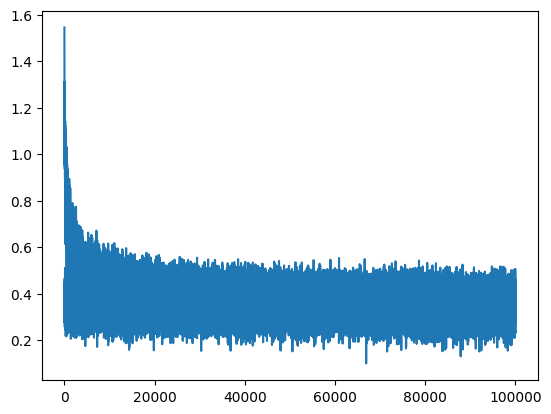

In [37]:
plt.plot(stepi,lossi)

In [47]:
# sample from the model
g = torch.Generator().manual_seed(2147483647+2)
#g = torch.Generator().manual_seed(10)
for _ in range(50):
    out=[]
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if(ix==0):
            break
    print(''.join(itos[i] for i in out))

taylon.
yesheliel.
liamilandan.
aleian.
kenneen.
lonniah.
zamden.
velaraylah.
jane.
keina.
mondilyannishillencey.
joylneilee.
doulynicolxyn.
elly.
kelly.
joan.
cailori.
kaavialane.
marioni.
caan.
syreataliendincy.
khyleinces.
saoaadury.
deencesun.
rhyly.
alvancilleilion.
mar.
aus.
sewry.
helne.
chidenimon.
nai.
abir.
laylieah.
saz.
nariasille.
jabi.
jeza.
zaleesians.
rpy.
grey.
charlinceyzeel.
phiel.
jensleifnon.
mayur.
namilee.
ene.
izinaj.
clinn.
alie.
